# 1、import data

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

features = pd.read_csv('feature/features_3m.csv')
labels = pd.read_csv('feature/labels_3m.csv', header=None)[1]

features_test = pd.read_csv('feature/features_test_3m.csv')

D:\Anaconda\envs\py3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 2、handle data

In [2]:
features = features.drop(['shop_id'], axis=1)

features_test = features_test.drop(['shop_id'], axis=1)

In [5]:
features.drop(['user_cnt'], axis=1, inplace=True)
features_test.drop(['user_cnt'], axis=1, inplace=True)

In [7]:
features = features.apply(lambda x: np.log(x+1))
columns = features.columns
features[columns] = MinMaxScaler().fit_transform(features[columns])

features_test = features_test.apply(lambda x: np.log(x+1))
features_test[columns] = MinMaxScaler().fit_transform(features_test[columns])

In [8]:
features['shop_id'] = list(range(1,3001))*4

In [5]:
# from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

In [118]:
features.drop([list(range(9000, 12000))], axis=0, inplace=True)
features

,ord_cnt,sale_amt,offer_cnt,offer_amt,rtn_cnt,rtn_amt,user_cnt,charge,consume,cmmt_num,...,cate_302,cate_303,cate_304,cate_305,cate_306,cate_307,cate_308,cate_309,cate_310,shop_id
0,0.640808,0.511516,0.620394,0.568795,0.523120,0.675170,0.641215,0.456626,0.669726,0.594357,...,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,1
1,0.590517,0.426161,0.628324,0.505046,0.566003,0.686246,0.590715,0.000000,0.000000,0.418842,...,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,2
2,0.562270,0.435168,0.636274,0.563678,0.473098,0.659747,0.562614,0.537482,0.675529,0.486223,...,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,3
3,0.594646,0.443725,0.616323,0.408664,0.202441,0.433060,0.595142,0.000000,0.686614,0.522229,...,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,4
4,0.658641,0.478909,0.733760,0.727187,0.340629,0.583032,0.659190,0.000000,0.000000,0.869208,...,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,5
5,0.780017,0.501724,0.725205,0.720417,0.419137,0.544299,0.780647,0.562853,0.777592,0.850301,...,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,6
6,0.723066,0.526506,0.782275,0.690252,0.447205,0.558479,0.723446,0.000000,0.000000,0.636710,...,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,7
7,0.618789,0.484022,0.673013,0.519295,0.404882,0.590854,0.619305,0.565371,0.810691,0.531687,...,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,8
8,0.754612,0.526660,0.717701,0.573324,0.632748,0.649360,0.754998,0.000000,0.000000,0.727450,...,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,9
9,0.279657,0.052156,0.348508,0.316672,0.225374,0.486629,0.278512,0.427187,0.607404,0.238535,...,1.0,0.0,0.0,0.75523,0.000000,0.0,0.0,0.0,0.0,10


In [119]:
labels = labels[:9000]
labels

0       382664.23
1        90416.49
2       290275.52
3        25298.68
4        61583.60
5       192902.92
6       197041.53
7       131577.81
8       384739.81
9        15058.82
10      251193.63
11      314304.81
12       75720.86
13       85608.59
14       86560.02
15      182961.39
16      367142.05
17       30882.47
18       87473.51
19       97889.40
20       62400.92
21      164206.67
22      215113.92
23      209452.75
24      114178.56
25      256998.44
26       36757.40
27      463979.19
28      322942.05
29       68617.30
          ...    
8970    406896.37
8971    264827.29
8972    160315.43
8973    127045.09
8974    201165.79
8975    206711.81
8976     27441.54
8977    190640.54
8978     43440.29
8979     45438.77
8980      8981.11
8981    571818.94
8982    149131.67
8983     37928.77
8984     92241.73
8985     51658.54
8986     12337.29
8987     63081.50
8988    457259.79
8989    130254.96
8990     13248.32
8991    123176.98
8992     30739.08
8993     24539.42
8994    26

In [9]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.35, random_state=0)

# 3、train & predict

In [10]:
def wmae(ground_truth, predictions):
    return abs(predictions-ground_truth).sum()/ground_truth.sum()

from sklearn.metrics import make_scorer
loss  = make_scorer(wmae, greater_is_better=False)

## 3.1 last month for reference

In [11]:
data_sales_sum = pd.read_csv('t_sales_sum.csv')
last_sales_sum = data_sales_sum[data_sales_sum['dt']=='2017-01-31']
last_sales = last_sales_sum.groupby(['shop_id'])[['sale_amt_3m']].mean().reset_index(drop=True)['sale_amt_3m']

In [12]:
last_y_train = []
for i in X_train['shop_id']:
    last_y_train.append(last_sales[i-1])
last_y_test = []
for i in X_test['shop_id']:
    last_y_test.append(last_sales[i-1])

wmae_train_last = wmae(y_train[:1000], last_y_train[:1000])
wmae_test_last = wmae(y_test, last_y_test)
print('predict train data with last sales_amt:{:.4f}'.format(wmae_train_last))
print('predict test data with last sales_amt:{:.4f}'.format(wmae_test_last))

predict train data with last sales_amt:0.3171
predict test data with last sales_amt:0.3149


## 3.2 train & predict

In [13]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test, switch=1):
    if switch:
        print("{} trained on {} samples...".format(learner.__class__.__name__, sample_size))
    results = {}
    
    start = time()
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time()
    results['train time'] = end - start
    
    start = time()
    predictions_train = learner.predict(X_train[:1000])
    predictions_test = learner.predict(X_test)
    end = time()
    results['prediction time'] = end - start

    results['train_wmae'] = wmae(y_train[:1000], predictions_train)
    results['test_wmae'] = wmae(y_test, predictions_test)
    
    print(results)
    print('\n')
    return results

In [14]:
def plot_result(results, mean_wmae_train_1, mean_wmae_val):
    import matplotlib.patches as mpatches
    fig, ax = plt.subplots(2, 2, figsize = (9,7))

    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train time', 'train_wmae', 'prediction time', 'test_wmae']):
            for i in np.arange(3):

                ax[int(j/2), j%2].bar(i+k*bar_width+0.15, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[int(j/2), j%2].set_xticks([0.45, 1.45, 2.45])
                ax[int(j/2), j%2].set_xticklabels(["1%", "10%", "100%"])
                ax[int(j/2), j%2].set_xlabel("Training Set Size")
                ax[int(j/2), j%2].set_xlim((-0.1, 3.0))
    
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("wmae Score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("wmae Score")
    
    ax[0, 0].set_title("Time on Training Subset")
    ax[0, 1].set_title("wmae on Training Subset")
    ax[1, 0].set_title("Time on Predicting subset")
    ax[1, 1].set_title("wmae Score on Validation Set")
    
    ax[0, 1].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    
    ax[0, 1].axhline(y = mean_wmae_train_1, xmin = 0, xmax = 1.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = mean_wmae_val, xmin = 0, xmax = 1.0, linewidth = 1, color = 'k', linestyle = 'dashed')

    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor = (-0.15, 2.6), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 14)
    
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()

In [15]:
del X_train['shop_id']
del X_test['shop_id']
X_train

,ord_cnt,sale_amt,offer_cnt,offer_amt,rtn_cnt,rtn_amt,user_cnt,charge,consume,cmmt_num,...,cate_301,cate_302,cate_303,cate_304,cate_305,cate_306,cate_307,cate_308,cate_309,cate_310
843,0.457679,0.218044,0.534940,0.398569,0.464001,0.611707,0.458061,0.000000,0.000000,0.385637,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
9450,0.282364,0.113985,0.399937,0.362317,0.225374,0.498994,0.282600,0.000000,0.000000,0.247230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
7766,0.797514,0.667252,0.803566,0.651524,0.648926,0.734693,0.798162,0.446748,0.650081,0.745728,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
9802,0.734881,0.609216,0.664925,0.568996,0.625992,0.721198,0.735436,0.000000,0.356987,0.699121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
8555,0.541544,0.401732,0.600444,0.621131,0.464001,0.660304,0.541847,0.000000,0.000000,0.523254,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
10868,0.311809,0.138810,0.000000,0.000000,0.202441,0.519509,0.309964,0.000000,0.000000,0.308461,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
7183,0.608179,0.510595,0.668654,0.632273,0.484286,0.658189,0.608602,0.514412,0.720154,0.533378,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
9859,0.695185,0.514275,0.461819,0.437523,0.570128,0.659958,0.695684,0.576088,0.839718,0.590517,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
3930,0.572267,0.283909,0.387354,0.315646,0.427816,0.554640,0.572630,0.000000,0.000000,0.475528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
5159,0.409933,0.161719,0.515434,0.591964,0.261560,0.474439,0.409821,0.534599,0.778975,0.471540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


### 6.2.1 RandomForestRegressor、GradientBoostingRegressor、AdaBoostRegressor

#### 6.2.1.1 建模预测

In [16]:
from time import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

reg_A = RandomForestRegressor(random_state=0)
reg_B = GradientBoostingRegressor(random_state=0)
reg_C = AdaBoostRegressor(random_state=0)

samples_1 = int(0.01*len(y_train))
samples_10 = int(0.1*len(y_train))
samples_100 = len(y_train)

start = time()
results_1 = {}
for reg in [reg_A, reg_B, reg_C]:
    reg_name = reg.__class__.__name__
    results_1[reg_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results_1[reg_name][i] = train_predict(reg, samples, X_train, y_train, X_test, y_test)
end = time()
print('3 models train & pred time:{:.4f}s'.format(end-start))
        
plot_result(results_1, wmae_train_last, wmae_test_last)

RandomForestRegressor trained on 96 samples...
{'train time': 0.09200525283813477, 'prediction time': 0.04300189018249512, 'train_wmae': 0.5103560194609553, 'test_wmae': 0.499414949490155}


RandomForestRegressor trained on 960 samples...
{'train time': 0.8470394611358643, 'prediction time': 0.05800223350524902, 'train_wmae': 0.2077331798543001, 'test_wmae': 0.4686623364445959}


RandomForestRegressor trained on 9600 samples...
{'train time': 29.17291498184204, 'prediction time': 0.0760035514831543, 'train_wmae': 0.17618557677469338, 'test_wmae': 0.424209112373876}


GradientBoostingRegressor trained on 96 samples...
{'train time': 0.26801419258117676, 'prediction time': 0.19501137733459473, 'train_wmae': 0.5128357178177808, 'test_wmae': 0.5038398601936019}


GradientBoostingRegressor trained on 960 samples...
{'train time': 3.0421524047851562, 'prediction time': 0.1820085048675537, 'train_wmae': 0.39607390272912124, 'test_wmae': 0.47955863557796724}


GradientBoostingRegressor trained

NameError: name 'mean_wmae_train' is not defined

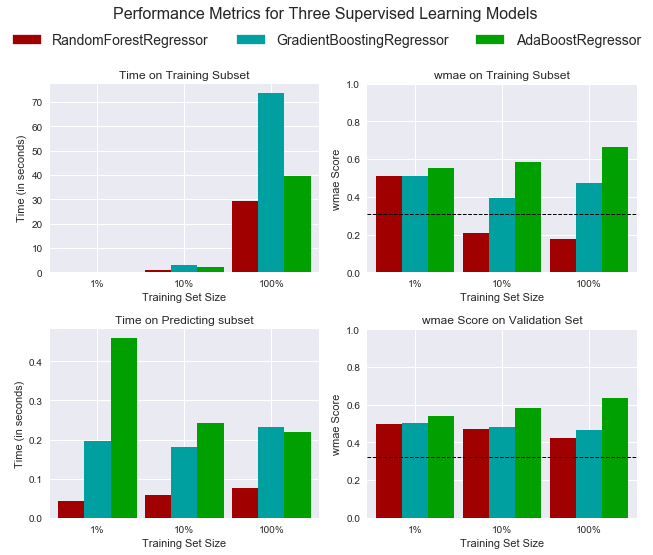

In [17]:
plot_result(results_1, wmae_train_last, wmae_test_last)

#### 6.2.1.2 调参

In [18]:
print(results_1['RandomForestRegressor'][2]['test_wmae'])
print(results_1['GradientBoostingRegressor'][2]['test_wmae'])

0.442927418296848
0.476879461223337


In [585]:
from sklearn.model_selection import GridSearchCV

reg = GradientBoostingRegressor(random_state=0)

params = {'learning_rate':[0.1, 0.2, 0.3], 'n_estimators':[90, 100, 110, 120]}

gd_search = GridSearchCV(reg, params, scoring=loss, n_jobs=-1)

gd_search.fit(features_train, labels_train)

best_reg = gd_search.best_estimator_

print(gd_search.best_params_)

{'learning_rate': 0.3, 'n_estimators': 120}


In [201]:
from sklearn.ensemble import GradientBoostingRegressor

reg_GBRs = []
for learning_rate in [0.3, 0.35, 0.4]:
    for n_estimators in [100, 120, 140]:
        reg_GBRs.append(GradientBoostingRegressor(random_state=0, learning_rate=learning_rate, n_estimators=n_estimators))

samples_1 = int(0.01*len(labels_train))
samples_10 = int(0.1*len(labels_train))
samples_100 = len(labels_train)

start = time()
results_GBRs = {}
n = 1
for reg in reg_GBRs:
    print("{} {} trained on {} samples...".format(reg.__class__.__name__, n, samples_100))
    results_GBRs['{}'.format(n)] = train_predict(reg, samples_100, X_train, y_train, X_test, y_test)
    n += 1
end = time()
print('KNN hand_search time:{:.4f}s'.format(end-start))

print(results_GBRs)

GradientBoostingRegressor 1 trained on 12000 samples...
GradientBoostingRegressor trained on 12000 samples...
GradientBoostingRegressor 2 trained on 12000 samples...
GradientBoostingRegressor trained on 12000 samples...
GradientBoostingRegressor 3 trained on 12000 samples...
GradientBoostingRegressor trained on 12000 samples...
GradientBoostingRegressor 4 trained on 12000 samples...
GradientBoostingRegressor trained on 12000 samples...
GradientBoostingRegressor 5 trained on 12000 samples...
GradientBoostingRegressor trained on 12000 samples...
GradientBoostingRegressor 6 trained on 12000 samples...
GradientBoostingRegressor trained on 12000 samples...
GradientBoostingRegressor 7 trained on 12000 samples...
GradientBoostingRegressor trained on 12000 samples...
GradientBoostingRegressor 8 trained on 12000 samples...
GradientBoostingRegressor trained on 12000 samples...
GradientBoostingRegressor 9 trained on 12000 samples...
GradientBoostingRegressor trained on 12000 samples...
KNN hand_s

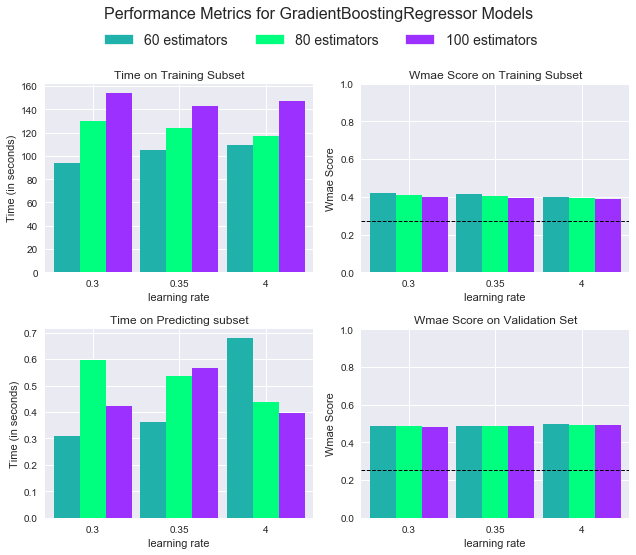

In [203]:
plot_result_GBRs(results_GBRs,mean_wmae_train, wmae_last_month)

In [202]:
def plot_result_GBRs(results, mean_wmae_train, wmae_last_month):
    import matplotlib.patches as mpatches
    fig, ax = plt.subplots(2, 2, figsize = (9,7))

    bar_width = 0.3
    colors = [ '#20B2AA', '#00FF7F', '#9B30FF']
    
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train time', 'train_wmae', 'prediction time', 'val_wmae']):

            ax[int(j/2), j%2].bar(k*bar_width+0.15+(k//3)/10, results[learner][metric], width = bar_width, color = colors[k%3])
            ax[int(j/2), j%2].set_xticks([0.45, 1.45, 2.45])
            ax[int(j/2), j%2].set_xticklabels(["0.3", "0.35", "4"])
            ax[int(j/2), j%2].set_xlabel("learning rate")
            ax[int(j/2), j%2].set_xlim((-0.1, 3.0))
    
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Wmae Score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Wmae Score")
    
    ax[0, 0].set_title("Time on Training Subset")
    ax[0, 1].set_title("Wmae Score on Training Subset")
    ax[1, 0].set_title("Time on Predicting subset")
    ax[1, 1].set_title("Wmae Score on Validation Set")
    
    ax[0, 1].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    
    ax[0, 1].axhline(y = mean_wmae_train, xmin = 0, xmax = 1.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = wmae_last_month, xmin = 0, xmax = 1.0, linewidth = 1, color = 'k', linestyle = 'dashed')

    patches = []
    n_estimators = [60, 80, 100]
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i%3], label = '{} estimators'.format(n_estimators[i%3])))
    plt.legend(handles = patches[:3], bbox_to_anchor = (-0.15, 2.6), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 14)
    
    plt.suptitle("Performance Metrics for GradientBoostingRegressor Models", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()

In [586]:
best_predictions = best_reg.predict(features_val)
best_wmae = wmae(labels_val, best_predictions)
print(best_wmae)

0.51543770711121


In [657]:
from sklearn.grid_search import RandomizedSearchCV
from scipy.stats import randint as sp_randint

strat = time()
reg = GradientBoostingRegressor(random_state=0)

params_rm = {'learning_rate':[0.01,0.1,0.3,0.5], 'n_estimators':sp_randint(90,130)}

rm_search = RandomizedSearchCV(reg, param_distributions=params_rm, scoring=loss, n_iter=20, n_jobs=-1)

rm_search.fit(features_train, labels_train)

best_reg_rm = rm_search.best_estimator_
end = time()
print('random search time:{:.4f}s'.format(end-start))
print(rm_search.best_params_)

best_predictions = best_reg.predict(features_val)
best_wmae = wmae(labels_val, best_predictions)
print(best_wmae)

random search time:46450.7871s
{'learning_rate': 0.5, 'n_estimators': 128}
0.51543770711121


**GradientBoostingRegressor 在val上为0.51543770711121**

In [ ]:
reg_KNNs = []
for neighbors in [3, 4, 5]:
    for p in [1, 2, 3]:
        for algo in ['ball_tree','kd_tree','brute']:
            reg_KNNs.append(KNeighborsRegressor(n_jobs=-1, n_neighbors=neighbors, p=p, algorithm=algo))

samples_1 = int(0.01*len(labels_train))
samples_10 = int(0.1*len(labels_train))
samples_100 = len(labels_train)

start = time()
results_KNNs = {}
n = 1
for reg in reg_KNNs:
    results_KNNs['{}'.format(n)] = train_predict(reg, samples_100, features_train, labels_train, features_val, labels_val)
    print("{} {} trained on {} samples...".format(reg.__class__.__name__, n, sample_100))
    n += 1
end = time()
print('KNN hand_search time:{:.4f}s'.format(end-start))
        

#### 6.2.1.3生成最终结果

In [686]:
submission_rm_gbr = pd.DataFrame()
submission_rm_gbr['shop_id'] = shops['shop_id']
submission_rm_gbr['pred_amt'] = best_predictions
submission_rm_gbr = submission_rm_gbr.groupby('shop_id')[['pred_amt']].mean()
submission_rm_gbr.to_csv('submission_rm_gbr.csv', header=False)
submission_rm_gbr

      shop_id       pred_amt
0           1  170312.078142
1           2   49249.323500
2           3  163876.157307
3           4   85151.760002
4           5   61404.215936
5           6  114690.333135
6           7   78626.273434
7           8  142780.393861
8           9  238775.702435
9          10   61404.215936
10         11  159550.498188
11         12   84563.684268
12         13   53600.226268
13         14   45877.512300
14         15   92655.417929
15         16   96684.153847
16         17  106447.667504
17         18   61404.215936
18         19   53464.804583
19         20   91070.873590
20         21   61404.215936
21         22  108349.612822
22         23   79866.985329
23         24  111167.147785
24         25  118322.067727
25         26  123278.218948
26         27   89271.608301
27         28  159840.388074
28         29  116835.040352
29         30   84361.091615
...       ...            ...
2970     2971  325359.974888
2971     2972  157124.645954
2972     2973 

,pred_amt
shop_id,
1,170312.078142
2,49249.323500
3,163876.157307
4,85151.760002
5,61404.215936
6,114690.333135
7,78626.273434
8,142780.393861
9,238775.702435


### 6.2.2 KNeighborsRegressor、DecisionTreeRegression、SVR

#### 6.2.2.1 建模预测

In [18]:
from time import time
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

reg_D = KNeighborsRegressor(n_jobs=-1)
reg_E = DecisionTreeRegressor()
reg_F = SVR(kernel='linear')

samples_1 = int(0.01*len(y_train))
samples_10 = int(0.1*len(y_train))
samples_100 = len(y_train)

start = time()
results_2 = {}
for reg in [reg_D, reg_E, reg_F]:
    reg_name = reg.__class__.__name__
    results_2[reg_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results_2[reg_name][i] = train_predict(reg, samples, X_train, y_train, X_test, y_test)
end = time()
print('3 model train & pred time:{:.4f}s'.format(end-start))
        
plot_result(results_2, wmae_train_last, wmae_test_last)

KNeighborsRegressor trained on 96 samples...
{'train time': 0.008000373840332031, 'prediction time': 0.5710132122039795, 'train_wmae': 0.6366597809612791, 'test_wmae': 0.6458314488581424}


KNeighborsRegressor trained on 960 samples...
{'train time': 0.15600085258483887, 'prediction time': 3.3881616592407227, 'train_wmae': 0.47504471996097763, 'test_wmae': 0.5830730990548925}


KNeighborsRegressor trained on 9600 samples...
{'train time': 2.883051872253418, 'prediction time': 29.283568859100342, 'train_wmae': 0.31723979360095156, 'test_wmae': 0.4251797477209807}


DecisionTreeRegressor trained on 96 samples...
{'train time': 0.0, 'prediction time': 0.031000137329101562, 'train_wmae': 0.5634368217778832, 'test_wmae': 0.5873831622491832}


DecisionTreeRegressor trained on 960 samples...
{'train time': 0.10300397872924805, 'prediction time': 0.03200197219848633, 'train_wmae': 0.01975280296729636, 'test_wmae': 0.5989532631373888}


DecisionTreeRegressor trained on 9600 samples...
{'train t

NameError: name 'mean_wmae_test_last' is not defined

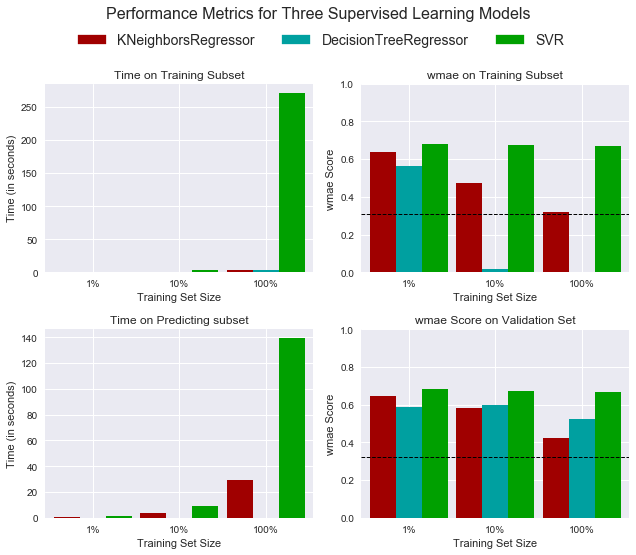

In [20]:
plot_result(results_2, wmae_train_last, wmae_test_last)

#### 6.2.2.2 调参

In [21]:
results_2['KNeighborsRegressor'][2]['test_wmae']

0.4251797477209807

In [ ]:
from sklearn.model_selection import GridSearchCV

start = time()
reg_2 = KNeighborsRegressor(n_jobs=-1)

params = {'n_neighbors':[2,3,4], 'p':[1,2,3]}

gd_search_KNN = GridSearchCV(reg_2, params, scoring=loss, n_jobs=-1)

gd_search_KNN.fit(features_train, labels_train)

best_reg_KNN = gd_search_KNN.best_estimator_

print(gd_search_KNN.best_params_)


best_predictions_KNN = best_reg_KNN.predict(features_val)
best_wmae__KNN = wmae(labels_val, best_predictions_KNN)
print(best_wmae_KNN)
end = time()
print('gs time:{:.4f}'.format(end-start))

with shop_id feature

In [158]:
from time import time
from sklearn.neighbors import KNeighborsRegressor

reg_KNNs = []
for neighbors in [3,4,5]:
    for p in [1, 2, 3]:
        reg_KNNs.append(KNeighborsRegressor(n_jobs=-1, n_neighbors=neighbors, p=p))

samples_1 = int(0.01*len(labels_train))
samples_10 = int(0.1*len(labels_train))
samples_100 = len(labels_train)

start = time()
results_KNNs = {}
n = 1
for reg in reg_KNNs:
    print("{} {} trained on {} samples...".format(reg.__class__.__name__, n, samples_100))
    results_KNNs['{}'.format(n)] = train_predict(reg, samples_100, X_train, y_train, X_test, y_test, 0)
    n += 1
end = time()
print('KNN hand_search time:{:.4f}s'.format(end-start))

# print(results_KNNs)
plot_result_KNNs(results_KNNs, mean_wmae_train, mean_wmae_test)

KNeighborsRegressor 1 trained on 12000 samples...
{'train time': 4.011444330215454, 'prediction time': 37.92919087409973, 'train_wmae': 0.21537091813268378, 'test_wmae': 0.3486958420752345}


KNeighborsRegressor 2 trained on 12000 samples...
{'train time': 4.752809762954712, 'prediction time': 31.62235951423645, 'train_wmae': 0.21858779874401082, 'test_wmae': 0.3447368938929253}


KNeighborsRegressor 3 trained on 12000 samples...
{'train time': 4.964610576629639, 'prediction time': 166.02284598350525, 'train_wmae': 0.2197768515092907, 'test_wmae': 0.3485031697108714}


KNeighborsRegressor 4 trained on 12000 samples...
{'train time': 4.9998109340667725, 'prediction time': 80.37812662124634, 'train_wmae': 0.2700372502326354, 'test_wmae': 0.3749333573869658}


KNeighborsRegressor 5 trained on 12000 samples...
{'train time': 6.4702136516571045, 'prediction time': 60.34471654891968, 'train_wmae': 0.27091195711037697, 'test_wmae': 0.38051255991139715}


KNeighborsRegressor 6 trained on 12000

NameError: name 'plot_result_KNNs' is not defined

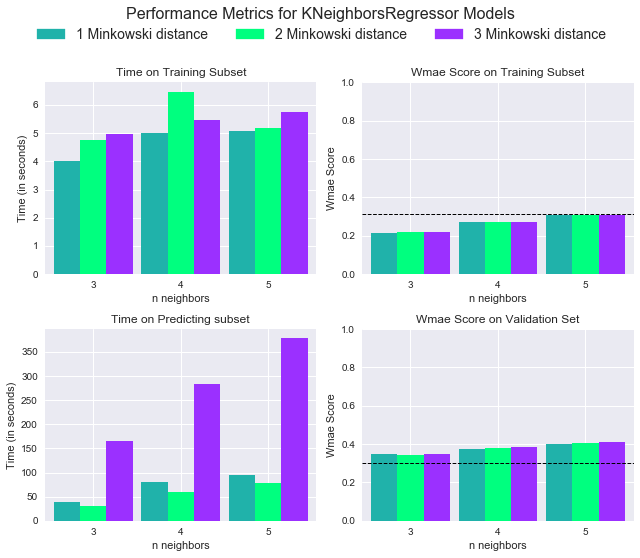

In [160]:
plot_result_KNNs(results_KNNs, mean_wmae_train, mean_wmae_test)

KNeighborsRegressor 1 trained on 12000 samples...
{'train time': 4.290245294570923, 'prediction time': 9.73155665397644, 'train_wmae': 0.0, 'test_wmae': 0.30800817663201807}


KNeighborsRegressor 2 trained on 12000 samples...
{'train time': 4.737270832061768, 'prediction time': 5.793331623077393, 'train_wmae': 0.0, 'test_wmae': 0.3019223037500578}


KNeighborsRegressor 3 trained on 12000 samples...
{'train time': 4.985285043716431, 'prediction time': 24.634408950805664, 'train_wmae': 0.0, 'test_wmae': 0.30058163997452775}


KNeighborsRegressor 4 trained on 12000 samples...
{'train time': 5.05328893661499, 'prediction time': 33.31690573692322, 'train_wmae': 0.17288763315841874, 'test_wmae': 0.32230003782136907}


KNeighborsRegressor 5 trained on 12000 samples...
{'train time': 5.3313047885894775, 'prediction time': 20.762187719345093, 'train_wmae': 0.16755882331398717, 'test_wmae': 0.3061241406239861}


KNeighborsRegressor 6 trained on 12000 samples...
{'train time': 7.390422821044922, 

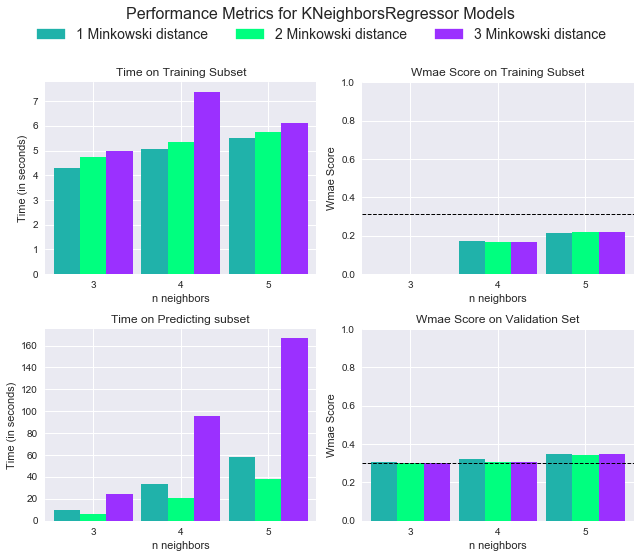

In [99]:
from time import time
from sklearn.neighbors import KNeighborsRegressor

reg_KNNs = []
for neighbors in [1,2,3]:
    for p in [1, 2, 3]:
        reg_KNNs.append(KNeighborsRegressor(n_jobs=-1, n_neighbors=neighbors, p=p))

samples_1 = int(0.01*len(labels_train))
samples_10 = int(0.1*len(labels_train))
samples_100 = len(labels_train)

start = time()
results_KNNs = {}
n = 1
for reg in reg_KNNs:
    print("{} {} trained on {} samples...".format(reg.__class__.__name__, n, samples_100))
    results_KNNs['{}'.format(n)] = train_predict(reg, samples_100, X_train, y_train, X_test, y_test, 0)
    n += 1
end = time()
print('KNN hand_search time:{:.4f}s'.format(end-start))

# print(results_KNNs)
plot_result_KNNs(results_KNNs, mean_wmae_train, mean_wmae_test)

In [159]:
# results_KNNs_aft = {}
# for i in range(len(results_KNNs)):
#     if (i+3)%3 == 0:
#         results_KNNs_aft[int((i+3)/3)] = results_KNNs['{}'.format(i+1)]
# print(results_KNNs_aft)

# plot_result_KNNs(results_KNNs_aft, mean_wmae_train, wmae_last_month)
plot_result_KNNs(results_KNNs, mean_wmae_train, wmae_last_month)

NameError: name 'results_KNNs' is not defined

In [159]:
def plot_result_KNNs(results, mean_wmae_train, wmae_last_month):
    import matplotlib.patches as mpatches
    fig, ax = plt.subplots(2, 2, figsize = (9,7))

    bar_width = 0.3
    colors = [ '#20B2AA', '#00FF7F', '#9B30FF']
    
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train time', 'train_wmae', 'prediction time', 'test_wmae']):

            ax[int(j/2), j%2].bar(k*bar_width+0.15+(k//3)/10, results[learner][metric], width = bar_width, color = colors[k%3])
            ax[int(j/2), j%2].set_xticks([0.45, 1.45, 2.45])
            ax[int(j/2), j%2].set_xticklabels(["3", "4", "5"])
            ax[int(j/2), j%2].set_xlabel("n neighbors")
            ax[int(j/2), j%2].set_xlim((-0.1, 3.0))
    
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Wmae Score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Wmae Score")
    
    ax[0, 0].set_title("Time on Training Subset")
    ax[0, 1].set_title("Wmae Score on Training Subset")
    ax[1, 0].set_title("Time on Predicting subset")
    ax[1, 1].set_title("Wmae Score on Validation Set")
    
    ax[0, 1].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    
    ax[0, 1].axhline(y = mean_wmae_train, xmin = 0, xmax = 1.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = wmae_last_month, xmin = 0, xmax = 1.0, linewidth = 1, color = 'k', linestyle = 'dashed')

    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i%3], label = '{} Minkowski distance'.format(learner)))
    plt.legend(handles = patches[:3], bbox_to_anchor = (-0.15, 2.6), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 14)
    
    plt.suptitle("Performance Metrics for KNeighborsRegressor Models", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()

#### 6.2.2.3 预测并生成最终结果

In [161]:
reg_KNN_best = KNeighborsRegressor(n_jobs=-1, n_neighbors=3, p=2)
reg_KNN_best.fit(features.drop('shop_id', axis=1), labels)
predictions_KNN_best = reg_KNN_best.predict(features_test)

In [162]:
submission_rm_knn = pd.DataFrame()
submission_rm_knn['shop_id'] = range(1, 3001)
submission_rm_knn['pred_amt'] = predictions_KNN_best
submission_rm_knn = submission_rm_knn.groupby('shop_id')[['pred_amt']].mean()
submission_rm_knn.to_csv('submission_knn_3_full.csv', header=False)

**提交一** 6181111为**0.786665。**     

 **提交二：**KNN 为**0.582138**（val上为0.3965415249333668）（submission_rm_knn.csv）

**提交三**：KNN为**0.645001**（val上为0.30058163997452775）（submission_sklearn_1.csv）

### 6.2.3 LinearRegression、Ridge、SGDRegressor

#### 6.2.4.1 建模

LinearRegression trained on 96 samples...
{'train time': 0.12900733947753906, 'prediction time': 0.0686032772064209, 'train_wmae': 0.5180919699735136, 'test_wmae': 0.5608028689088096}


LinearRegression trained on 960 samples...
{'train time': 1.926243543624878, 'prediction time': 0.15700888633728027, 'train_wmae': 75199062259.3206, 'test_wmae': 2856104058814.0493}


LinearRegression trained on 9600 samples...
{'train time': 31.138957023620605, 'prediction time': 0.15800881385803223, 'train_wmae': 0.28094856019864445, 'test_wmae': 3516602161.072064}


Ridge trained on 96 samples...
{'train time': 0.047002315521240234, 'prediction time': 0.07700443267822266, 'train_wmae': 0.5379228203074723, 'test_wmae': 0.5523375303298844}


Ridge trained on 960 samples...
{'train time': 0.34401988983154297, 'prediction time': 0.08400464057922363, 'train_wmae': 0.2927536888783665, 'test_wmae': 0.5282510667685107}


Ridge trained on 9600 samples...
{'train time': 4.7792394161224365, 'prediction time': 0

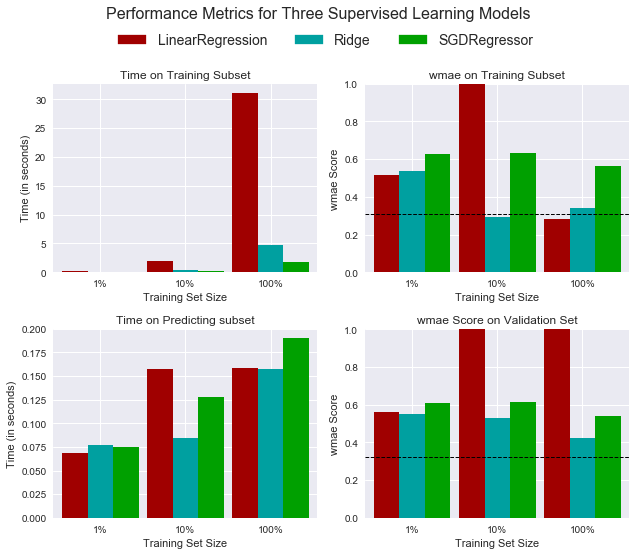

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor

reg_G = LinearRegression()
reg_H = Ridge(random_state=0)
reg_I = SGDRegressor(random_state=0)

samples_1 = int(0.01*len(y_train))
samples_10 = int(0.1*len(y_train))
samples_100 = len(y_train)

start = time()
results_3 = {}
for reg in [reg_G, reg_H, reg_I]:
    reg_name = reg.__class__.__name__
    results_3[reg_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results_3[reg_name][i] = train_predict(reg, samples, X_train, y_train, X_test, y_test)
end = time()
print('3 model train & pred time:{:.4f}s'.format(end-start))
        
plot_result(results_3, wmae_train_last, wmae_test_last)

#### 6.2.4.2调参

In [15]:
print(results_3['LinearRegression'][2]['test_wmae'])
print(results_3['Ridge'][2]['test_wmae'])

0.3704742617590044
0.40630651817009167


[LinearRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)可调参数有限 

In [ ]:
from sklearn.linear_model import LinearRegression

reg_LineReg = []
for neighbors in [3, 4, 5]:
    for p in [2, 3, 4]:
        reg_LineReg.append(LinearRegression(n_jobs=-1, n_neighbors=neighbors, p=p))

samples_1 = int(0.01*len(labels_train))
samples_10 = int(0.1*len(labels_train))
samples_100 = len(labels_train)

start = time()
results_KNNs = {}
n = 1
for reg in reg_KNNs:
    print("{} {} trained on {} samples...".format(reg.__class__.__name__, n, samples_100))
    results_KNNs['{}'.format(n)] = train_predict(reg, samples_100, features_train, labels_train, features_val, labels_val)
    n += 1
end = time()
print('KNN hand_search time:{:.4f}s'.format(end-start))

print(results_KNNs)
# plot_result(results_2, mean_wmae_train, mean_wmae_val)

### 6.2.4 ElasticNet、Lasso、BayesianRidge

#### 6.2.4.1 建模

ElasticNet trained on 96 samples...
{'train time': 0.014000654220581055, 'prediction time': 0.09300518035888672, 'train_wmae': 0.6328876448670582, 'test_wmae': 0.6177644706408068}


ElasticNet trained on 960 samples...
{'train time': 0.1300032138824463, 'prediction time': 0.09200286865234375, 'train_wmae': 0.6749743848912593, 'test_wmae': 0.646831499659001}


ElasticNet trained on 9600 samples...
{'train time': 1.906050682067871, 'prediction time': 0.19201087951660156, 'train_wmae': 0.6857312468747656, 'test_wmae': 0.6534059033262146}


Lasso trained on 96 samples...


D:\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


{'train time': 0.1980113983154297, 'prediction time': 0.12900733947753906, 'train_wmae': 0.509489077185688, 'test_wmae': 0.5522503681943947}


Lasso trained on 960 samples...
{'train time': 1.918069839477539, 'prediction time': 0.10200262069702148, 'train_wmae': 0.11920068065447799, 'test_wmae': 0.9140742421339099}


Lasso trained on 9600 samples...
{'train time': 83.57899236679077, 'prediction time': 0.139007568359375, 'train_wmae': 0.28721475641688426, 'test_wmae': 0.3917538644659277}


BayesianRidge trained on 96 samples...
{'train time': 0.18300771713256836, 'prediction time': 0.1210029125213623, 'train_wmae': 0.6919030897768261, 'test_wmae': 0.6737607247883429}


BayesianRidge trained on 960 samples...
{'train time': 37.9319224357605, 'prediction time': 0.09000444412231445, 'train_wmae': 0.3380205939952003, 'test_wmae': 0.5242861317294965}


BayesianRidge trained on 9600 samples...
{'train time': 118.99243068695068, 'prediction time': 0.11600327491760254, 'train_wmae': 0.347167224

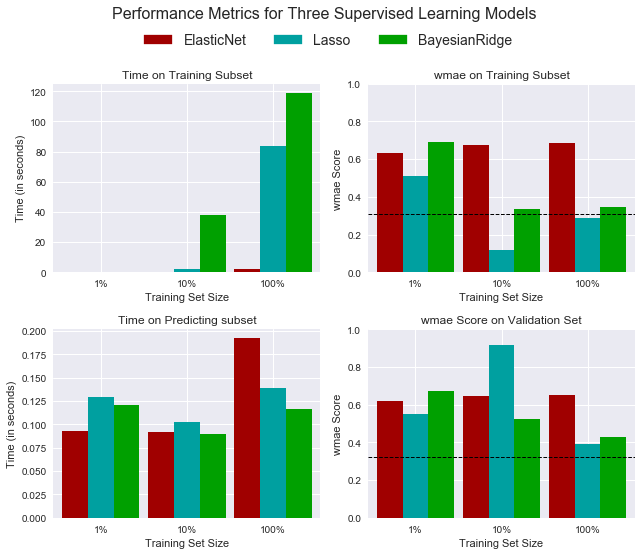

In [23]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge

reg_G = ElasticNet(random_state=0)
reg_H = Lasso(random_state=0)
reg_I = BayesianRidge()

samples_1 = int(0.01*len(y_train))
samples_10 = int(0.1*len(y_train))
samples_100 = len(y_train)

start = time()
results_4 = {}
for reg in [reg_G, reg_H, reg_I]:
    reg_name = reg.__class__.__name__
    results_4[reg_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results_4[reg_name][i] = train_predict(reg, samples, X_train, y_train, X_test, y_test)
end = time()
print('3 model train & pred time:{:.4f}s'.format(end-start))
        
plot_result(results_4, wmae_train_last, wmae_test_last)

#### 6.2.4.2调参

In [17]:
X_train

,ord_cnt,sale_amt,offer_cnt,offer_amt,rtn_cnt,rtn_amt,user_cnt,charge,consume,cmmt_num,...,cate_301,cate_302,cate_303,cate_304,cate_305,cate_306,cate_307,cate_308,cate_309,cate_310
13136,0.525938,0.434594,0.535288,0.386164,0.292543,0.473223,0.526451,0.417936,0.000000,0.463188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3536,0.673916,0.552176,0.735637,0.677998,0.325876,0.456494,0.674755,0.561756,0.811361,0.557004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10296,0.700546,0.760895,0.753636,0.764285,0.695784,0.852296,0.701285,0.585267,0.862821,0.557435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2137,0.545042,0.476824,0.516359,0.392145,0.408958,0.571535,0.545834,0.000000,0.000000,0.430397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14775,0.542250,0.649126,0.610506,0.492984,0.335292,0.804995,0.543038,0.471806,0.702526,0.465150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10575,0.362985,0.326103,0.000000,0.000000,0.227643,0.454863,0.363512,0.000000,0.000000,0.308788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11938,0.679979,0.627217,0.741666,0.688818,0.513669,0.644625,0.680901,0.362821,0.304196,0.589713,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11006,0.744841,0.685561,0.794296,0.736665,0.545102,0.664123,0.745504,0.000000,0.660302,0.663790,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7937,0.753400,0.685339,0.109124,0.241694,0.524352,0.675973,0.754212,0.000000,0.000000,0.598897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13178,0.409374,0.339510,0.137699,0.191224,0.279157,0.488719,0.409969,0.000000,0.000000,0.366810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
print(results_4['Lasso'][2]['test_wmae'])

0.3709972589233897


In [18]:
from sklearn.linear_model import Lasso

reg_Lassoes = []
for alpha in [0.2, 0.3, 0.4]:
    reg_Lassoes.append(Lasso(random_state=0, alpha=alpha))

samples_1 = int(0.01*len(y_train))
samples_10 = int(0.1*len(y_train))
samples_100 = len(y_train)

start = time()
results_Lassoes = {}
n = 1
for reg in reg_Lassoes:
    print("{} {} trained on {} samples...".format(reg.__class__.__name__, n, samples_100))
    results_Lassoes['{}'.format(n)] = train_predict(reg, samples_100, X_train, y_train, X_test, y_test, 0)
    n += 1
end = time()
print('Lasso hand_search time:{:.4f}s'.format(end-start))

print(results_Lassoes)
# plot_result(results_2, mean_wmae_train, mean_wmae_val)

Lasso 1 trained on 12000 samples...


D:\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


{'train time': 221.25665521621704, 'prediction time': 0.3560202121734619, 'train_wmae': 0.2982140364819531, 'test_wmae': 0.36966746267947953}


Lasso 2 trained on 12000 samples...
{'train time': 202.021555185318, 'prediction time': 0.3210182189941406, 'train_wmae': 0.29846505703322035, 'test_wmae': 0.36959401731068275}


Lasso 3 trained on 12000 samples...
{'train time': 185.946635723114, 'prediction time': 0.2760157585144043, 'train_wmae': 0.2988027952224839, 'test_wmae': 0.3695818149547699}


Lasso hand_search time:610.1849s
{'1': {'train time': 221.25665521621704, 'prediction time': 0.3560202121734619, 'train_wmae': 0.2982140364819531, 'test_wmae': 0.36966746267947953}, '2': {'train time': 202.021555185318, 'prediction time': 0.3210182189941406, 'train_wmae': 0.29846505703322035, 'test_wmae': 0.36959401731068275}, '3': {'train time': 185.946635723114, 'prediction time': 0.2760157585144043, 'train_wmae': 0.2988027952224839, 'test_wmae': 0.3695818149547699}}


In [20]:
features_test

,ord_cnt,sale_amt,offer_cnt,offer_amt,rtn_cnt,rtn_amt,user_cnt,charge,consume,cmmt_num,...,cate_301,cate_302,cate_303,cate_304,cate_305,cate_306,cate_307,cate_308,cate_309,cate_310
0,0.619744,0.747410,0.558906,0.547771,0.624067,0.713227,0.619670,0.665626,0.617772,0.508525,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
1,0.595253,0.619525,0.522908,0.463385,0.509721,0.618102,0.594868,0.000000,0.000000,0.472737,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
2,0.556513,0.692637,0.531714,0.513732,0.635247,0.728054,0.556639,0.867813,0.806323,0.403262,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
3,0.470860,0.517596,0.337292,0.412970,0.216882,0.359715,0.470614,0.798311,0.801496,0.383845,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
4,0.611613,0.777641,0.579657,0.569595,0.532109,0.681871,0.611751,0.610831,0.570324,0.703797,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
5,0.670122,0.643548,0.676823,0.755272,0.171875,0.310180,0.670273,0.000000,0.603569,0.777408,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
6,0.733522,0.760908,0.796450,0.762589,0.468675,0.559738,0.733474,0.000000,0.000000,0.624547,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
7,0.633427,0.751860,0.703103,0.752112,0.452192,0.600238,0.633570,0.827931,0.844085,0.483018,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
8,0.778790,0.895799,0.833289,0.707047,0.637921,0.690925,0.778936,0.000000,0.000000,0.723263,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
9,0.384325,0.459510,0.474411,0.424540,0.304433,0.548412,0.384412,0.000000,0.000000,0.252671,...,0.0,1.0,0.0,0.0,0.75523,0.000000,0.0,0.0,0.0,0.0


In [21]:
reg_Lasso_best = Lasso(random_state=0, alpha=0.4)
reg_Lasso_best.fit(features.drop('shop_id', axis=1), labels)
predictions_Lasso_best = reg_Lasso_best.predict(features_test)

D:\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [32]:
baseline = pd.read_csv('other/submission_baseline.csv', header=None)[1].tolist()
predictions_Lasso_best_rec = predictions_Lasso_best.tolist()
n = 0
for i in range(len(predictions_Lasso_best_rec)):
    if predictions_Lasso_best_rec[i] < 0:
        predictions_Lasso_best_rec[i] = baseline[i]
        n += 1
print(n)

90


In [39]:
submission_lasso = pd.DataFrame()
submission_lasso['shop_id'] = range(1, 3001)
submission_lasso['pred_amt'] = predictions_Lasso_best_rec
submission_lasso = submission_lasso.groupby('shop_id')[['pred_amt']].mean()
submission_lasso.to_csv('submission_lasso_04_full_rec.csv', header=False)

### 6.2.5 KernelRidge、GaussianProcessRegressor、HuberRegressor

#### 6.2.5.1 建模

In [12]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import HuberRegressor

reg_J = KernelRidge()
reg_K = GaussianProcessRegressor(random_state=0)
reg_L = HuberRegressor()

samples_1 = int(0.01*len(y_train))
samples_10 = int(0.1*len(y_train))
samples_100 = len(y_train)

start = time()
results_5 = {}
for reg in [reg_J, reg_K, reg_L]:
    reg_name = reg.__class__.__name__
    results_5[reg_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results_5[reg_name][i] = train_predict(reg, samples, X_train, y_train, X_test, y_test)
end = time()
print('3 model train & pred time:{:.4f}s'.format(end-start))
        
plot_result(results_5, wmae_train_last, wmae_test_last)

NameError: name 'time' is not defined

In [37]:
results_2

{'DecisionTreeRegressor': {0: {'prediction time': 0.1360034942626953,
   'test_wmae': 0.6590020844885726,
   'train time': 0.15900039672851562,
   'train_wmae': 0.6215932372193577},
  1: {'prediction time': 0.07800030708312988,
   'test_wmae': 0.6012885211071679,
   'train time': 0.516007661819458,
   'train_wmae': 0.0},
  2: {'prediction time': 0.09360027313232422,
   'test_wmae': 0.5695373846178188,
   'train time': 18.270054578781128,
   'train_wmae': 0.0}},
 'KNeighborsRegressor': {0: {'prediction time': 1.8402431011199951,
   'test_wmae': 0.5929078395762657,
   'train time': 0.041002511978149414,
   'train_wmae': 0.5834837536100694},
  1: {'prediction time': 16.281630992889404,
   'test_wmae': 0.5790593338794665,
   'train time': 0.9286088943481445,
   'train_wmae': 0.47440672891370317},
  2: {'prediction time': 87.23915648460388,
   'test_wmae': 0.40510694593007174,
   'train time': 16.009037971496582,
   'train_wmae': 0.309535271657765}},
 'SVR': {0: {'prediction time': 5.341218

In [60]:
len(results_all)

15

#### 6.2.5.2 调参

GPR is really great, nearly unbelievable. Actually, **fake**

with shop_id features

In [11]:
X_train

,ord_cnt,sale_amt,offer_cnt,offer_amt,rtn_cnt,rtn_amt,user_cnt,charge,consume,cmmt_num,...,cate_302,cate_303,cate_304,cate_305,cate_306,cate_307,cate_308,cate_309,cate_310,shop_id
843,0.457679,0.218044,0.534940,0.398569,0.464001,0.611707,0.458061,0.000000,0.000000,0.385637,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,844
9450,0.282364,0.113985,0.399937,0.362317,0.225374,0.498994,0.282600,0.000000,0.000000,0.247230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,451
7766,0.797514,0.667252,0.803566,0.651524,0.648926,0.734693,0.798162,0.446748,0.650081,0.745728,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,1767
9802,0.734881,0.609216,0.664925,0.568996,0.625992,0.721198,0.735436,0.000000,0.356987,0.699121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,803
8555,0.541544,0.401732,0.600444,0.621131,0.464001,0.660304,0.541847,0.000000,0.000000,0.523254,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,2556
10868,0.311809,0.138810,0.000000,0.000000,0.202441,0.519509,0.309964,0.000000,0.000000,0.308461,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,1869
7183,0.608179,0.510595,0.668654,0.632273,0.484286,0.658189,0.608602,0.514412,0.720154,0.533378,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,1184
9859,0.695185,0.514275,0.461819,0.437523,0.570128,0.659958,0.695684,0.576088,0.839718,0.590517,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,860
3930,0.572267,0.283909,0.387354,0.315646,0.427816,0.554640,0.572630,0.000000,0.000000,0.475528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,931
5159,0.409933,0.161719,0.515434,0.591964,0.261560,0.474439,0.409821,0.534599,0.778975,0.471540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,2160


In [15]:
from sklearn.gaussian_process import GaussianProcessRegressor
from time import time

reg_K = GaussianProcessRegressor(random_state=0)

start = time()
reg_K.fit(X_train, y_train)
end = time()
print('GaussianProcessRegression train time:{:.4f}s'.format(end-start))

start = time()
pred_gpr = reg_K.predict(X_test)
end = time()
print('GaussianProcessRegression predict time:{:.4f}s'.format(end-start))
print('wmae of gpr:{:.4f}'.format(wmae(y_test, pred_gpr)))

GaussianProcessRegression train time:186.4883s
GaussianProcessRegression predict time:91.9469s
wmae of gpr:0.3244


In [147]:
n = 0
for i in pred_gpr:
    if i < 0:
        n += 1
n

19

In [148]:
a = pd.DataFrame()
a['real'] = y_test
a['gpr'] = pred_gpr

a[100:200]

,real,gpr
6214,24149.53,25319.365763
8378,79769.48,100841.838582
735,500561.74,366362.580230
4508,228209.76,256343.992721
7009,141123.62,116400.489002
2861,629905.84,689777.721874
1571,59617.45,58395.940231
6938,141476.45,228477.789290
1615,62158.09,47940.635701
495,97471.80,79836.785776


In [149]:
features_test['shop_id'] = range(1,3001)

In [150]:
result_gpr = reg_K.predict(features_test)
result_gpr

array([ 307870.34404075,   91793.87773867,  167064.0845318 , ...,
        196225.1144064 ,   49337.26783371,   96590.54980666])

In [151]:
a = pd.DataFrame(result_gpr)
a[a[0]<0].shape

(123, 1)

In [44]:
redult_gpr_45=result_gpr

In [109]:
result_gpr_55 = result_gpr

In [59]:
result_gpr_6_20 = result_gpr

In [74]:
result_gpr_9_30 = result_gpr

In [85]:
result_gpr_9_20 = result_gpr

In [95]:
result_gpr_9_35 = result_gpr

In [128]:
result_gpr_f9_30 = result_gpr

In [140]:
result_gpr_f9_40 = result_gpr

In [152]:
result_gpr_f9_20 = result_gpr

In [153]:
a = data_sales_sum_last.sum()
dif_45 = (redult_gpr_45.sum()-a)/a
dif_55 = (result_gpr_55.sum()-a)/a
dif_6_20 = (result_gpr_6_20.sum()-a)/a
dif_9_30 = (result_gpr_9_30.sum()-a)/a
dif_9_20 = (result_gpr_9_20.sum()-a)/a
dif_9_35 = (result_gpr_9_35.sum()-a)/a
dif_f9_30 = (result_gpr_f9_30.sum()-a)/a
dif_f9_40 = (result_gpr_f9_40.sum()-a)/a
dif_f9_20 = (result_gpr_f9_20.sum()-a)/a
print(dif_45, dif_55, dif_6_20, dif_9_30, dif_9_20, dif_9_35, dif_f9_30, dif_f9_40, dif_f9_20)

-0.192905070367 -0.14472870408 -0.298166902882 -0.141121203178 -0.103766244348 -0.16239656999 -0.0568529662175 -0.140283989531 -0.070057411271


In [139]:
a = pd.DataFrame()

a['real'] = data_sales_sum_last
a['gpr'] = result_gpr

a[:100]

,real,gpr
shop_id,,
1,219097.84,310522.525466
2,79214.06,65401.293975
3,134667.29,244621.610440
4,47633.91,17169.637293
5,233025.51,108289.838599
6,105927.87,198773.395264
7,189101.04,122022.891923
8,207094.16,135081.117026
9,447212.23,352648.991830


In [25]:
reg_K = GaussianProcessRegressor(random_state=0)
reg_K.fit(features, labels)

prediction_gpr = reg_K.predict(features_test)

In [22]:
reg_K.kernel_

1**2 * RBF(length_scale=1)

In [39]:
result_gpr

array([ 296055.4084122 ,   87751.26118351,  225707.61230139, ...,
         89467.16357582,   52116.11627554,  104666.14267556])

In [20]:
b = pd.DataFrame()
b['gpr'] = result_gpr
b['real'] = data_sales_sum_last
# b['gpr_full'] = prediction_gpr

print(b[b['gpr']<0].shape)
b[:3000]

(197, 2)


,gpr,real
0,296055.408412,NaN
1,87751.261184,219097.84
2,225707.612301,79214.06
3,46430.204828,134667.29
4,125498.784211,47633.91
5,194540.128968,233025.51
6,149025.560829,105927.87
7,184405.739292,189101.04
8,188454.388052,207094.16
9,-4468.887320,447212.23


In [19]:
data_sales_sum = pd.read_csv('t_sales_sum.csv')
data_sales_sum_last = data_sales_sum[data_sales_sum['dt']=='2017-01-31'].groupby('shop_id')[['sale_amt_3m']].mean()['sale_amt_3m']
data_sales_sum_last

shop_id
1       219097.84
2        79214.06
3       134667.29
4        47633.91
5       233025.51
6       105927.87
7       189101.04
8       207094.16
9       447212.23
10       33373.05
11      227926.47
12      146061.99
13       42115.62
14      122426.50
15      250954.45
16      340421.66
17      339309.01
18       42579.64
19       76240.07
20      113332.50
21       45987.53
22      161232.86
23       39113.11
24      276138.30
25       45762.08
26      243194.75
27      102129.36
28      684223.00
29      450845.01
30       86080.58
          ...    
2971    483800.50
2972    277341.70
2973    228094.41
2974    139921.63
2975    219168.56
2976    320012.22
2977     22840.14
2978    215978.12
2979     20113.66
2980     74962.54
2981      9860.75
2982    623455.35
2983    158838.89
2984     44657.50
2985     80011.97
2986     41490.21
2987     12422.37
2988     87948.54
2989    512352.91
2990    217663.32
2991     14366.67
2992    134478.36
2993     25553.73
2994     27617.71
29

In [154]:
for i in range(len(result_gpr)):
    if result_gpr[i] < 0:
        result_gpr[i] = -result_gpr[i]
result_gpr

array([ 307870.34404075,   91793.87773867,  167064.0845318 , ...,
        196225.1144064 ,   49337.26783371,   96590.54980666])

In [155]:
submission = pd.DataFrame()
submission['shop_id'] = range(1, 3001)
submission['pred_3m'] = result_gpr
submission.to_csv('submission/gpr_3m_f9_20.csv', header=False, index=None)

**提交11.28**：gpr：**0.661519**（submission/gpr_3m.csv）

**提交12.02**：gpr:**0.690104**(submission/gpr_3m_f9_30.csv)

**提交12.03**：gpr：**0.634886**(gpr_3m_0.45.csv)

In [21]:
for i in range(len(result_gpr)):
    if result_gpr[i] < 0:
        result_gpr[i] = 0
result_gpr

array([ 296055.4084122 ,   87751.26118351,  225707.61230139, ...,
         89467.16357582,   52116.11627554,  104666.14267556])

In [22]:
submission = pd.DataFrame()
submission['shop_id'] = range(1, 3001)
submission['pred_3m'] = result_gpr
submission.to_csv('submission/gpr_3m_0.csv', header=False, index=None)

**提交11.29**：gpr:**0.6834**(submission/gpr_3m_0.csv)。**负数归零比去反值效果差**

without shop_id features

In [94]:
del X_train['shop_id']
del X_test['shop_id']
del features_test['shop_id']
features_test

,ord_cnt,sale_amt,offer_cnt,offer_amt,rtn_cnt,rtn_amt,user_cnt,charge,consume,cmmt_num,...,cate_301,cate_302,cate_303,cate_304,cate_305,cate_306,cate_307,cate_308,cate_309,cate_310
0,0.619744,0.747410,0.558906,0.547771,0.624067,0.713227,0.619670,0.665626,0.617772,0.508525,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
1,0.595253,0.619525,0.522908,0.463385,0.509721,0.618102,0.594868,0.000000,0.000000,0.472737,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
2,0.556513,0.692637,0.531714,0.513732,0.635247,0.728054,0.556639,0.867813,0.806323,0.403262,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
3,0.470860,0.517596,0.337292,0.412970,0.216882,0.359715,0.470614,0.798311,0.801496,0.383845,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
4,0.611613,0.777641,0.579657,0.569595,0.532109,0.681871,0.611751,0.610831,0.570324,0.703797,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
5,0.670122,0.643548,0.676823,0.755272,0.171875,0.310180,0.670273,0.000000,0.603569,0.777408,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
6,0.733522,0.760908,0.796450,0.762589,0.468675,0.559738,0.733474,0.000000,0.000000,0.624547,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
7,0.633427,0.751860,0.703103,0.752112,0.452192,0.600238,0.633570,0.827931,0.844085,0.483018,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
8,0.778790,0.895799,0.833289,0.707047,0.637921,0.690925,0.778936,0.000000,0.000000,0.723263,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
9,0.384325,0.459510,0.474411,0.424540,0.304433,0.548412,0.384412,0.000000,0.000000,0.252671,...,0.0,1.0,0.0,0.0,0.75523,0.000000,0.0,0.0,0.0,0.0


In [95]:
from sklearn.gaussian_process import GaussianProcessRegressor

reg_K = GaussianProcessRegressor(random_state=0)

start = time()
reg_K.fit(X_train, y_train)
end = time()
print('GaussianProcessRegression train time;{:.4f}s'.format(end-start))

start = time()
pred_gpr = reg_K.predict(X_test)
end = time()
print('GaussianProcessRegression predict time:{:.4f}s'.format(end-start))
print('wmae of gpr:{:.4f}s'.format(wmae(y_test, pred_gpr)))

GaussianProcessRegression train time;660.8898s
GaussianProcessRegression predict time:162.8563s
wmae of gpr:0.6224s


### 6.2.6 Voting（KNN、Lasso、LinearRegressor）

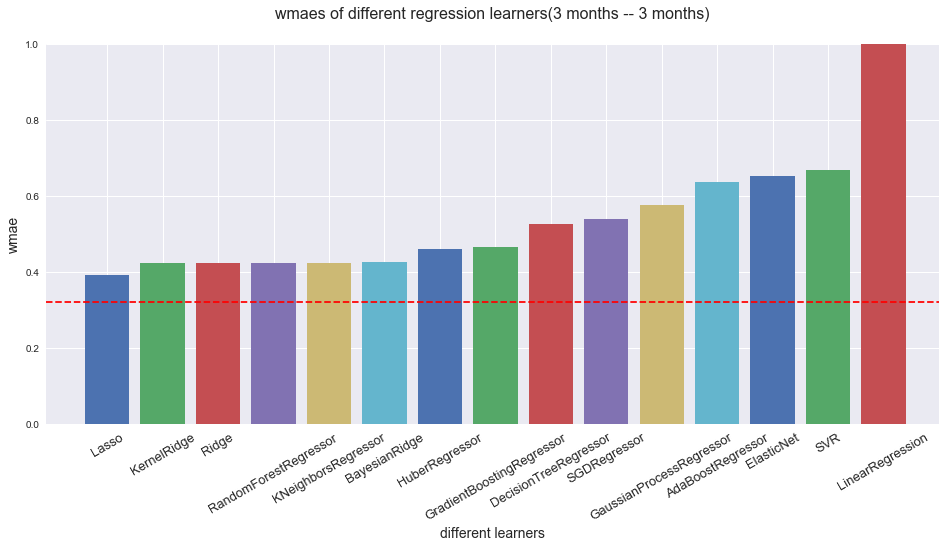

In [28]:
from collections import ChainMap
results_all = dict(ChainMap(results_1, results_2, results_3, results_4, results_5))

x = range(1, len(results_all)+1)
learners = list(results_all.keys())

wmaes = []
for learner in learners:
    wmaes.append(results_all[learner][2]['test_wmae'])
wmaes = np.array(wmaes)
indexes = np.argsort(wmaes)
learners_sorted = []
for index in indexes:
    learners_sorted.append(learners[index])
    
fig, ax = plt.subplots(1,1, figsize = (16,7))
i = 0
for learner in learners_sorted:
    ax.bar(i+1, results_all[learner][2]['test_wmae'], width=0.8)
    i += 1
    
plt.plot([-0.1, len(learners)+1], [wmae_test_last, wmae_test_last], 'r', linestyle='--')

ax.set_xticks(list(x))
ax.set_xticklabels(learners_sorted, rotation=30, fontsize=13)
ax.set_xlim((-0.1, len(learners)+1))
ax.set_ylim((0, 1.0))

plt.xlabel('different learners', fontsize=14)
plt.ylabel('wmae', fontsize=14)
plt.title('wmaes of different regression learners(3 months -- 3 months)', fontsize=16, y=1.05)

plt.show()

In [163]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

reg_vote1 = KNeighborsRegressor(n_jobs=-1, n_neighbors=3, p=3)
reg_vote2 = Lasso(random_state=0)
reg_vote3 = LinearRegression()

start = time()
reg_vote1.fit(features_train, labels_train)
pred_vote1 = reg_vote1.predict(features_val)
end = time()
print('reg_vote1 train and pred time: {:.4f}s'.format(end - start))

start = time()
reg_vote2.fit(features_train, labels_train)
pred_vote2 = reg_vote2.predict(features_val)
end = time()
print('reg_vote2 train and pred time: {:.4f}s'.format(end - start))

start = time()
reg_vote3.fit(features_train, labels_train)
pred_vote3 = reg_vote3.predict(features_val)
end = time()
print('reg_vote3 train and pred time: {:.4f}s'.format(end - start))

reg_vote1 train and pred time: 108.4592s


D:\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


reg_vote2 train and pred time: 106.7625s
reg_vote3 train and pred time: 40.4703s


In [176]:
print('wmae KNN:{:.6f}'.format(wmae(labels_val, pred_vote1)))
print('wmae Lasso:{:.6f}'.format(wmae(labels_val, pred_vote2)))
print('wmae LineRegre:{:.6f}'.format(wmae(labels_val, pred_vote3)))

wmae KNN:0.396542
wmae Lasso:0.474679
wmae LineRegre:0.471986


In [177]:
pred_vote = 0.8*pred_vote1+0.1*pred_vote2+0.1*pred_vote3
wmae(labels_val, pred_vote)

0.39969736705641973

# 7、去商品类features预测

## 7.1 合并features_0

In [181]:
features_train_no_product = pd.concat([features_train_1_0, features_2_0, features_3_0, features_4_0]).reset_index(drop=True)
# labels_train, features_val_0, labels_val不用改变

## 7.2 特征优化

In [182]:
features_train_no_product = features_train_no_product.drop(['shop_id'], axis=1)
# features_train_no_product = features_train_no_product.apply(lambda x: np.log(x+1))
# columns_no_product = features_train_no_product.columns
# features_train_no_product[columns_no_product] = MinMaxScaler().fit_transform(features_train_no_product[columns_no_product])

features_val_no_product = features_val_0.drop(['shop_id'], axis=1)
# features_val_no_product = features_val_no_product.apply(lambda x: np.log(x+1))
# features_val_no_product[columns_no_product] = MinMaxScaler().fit_transform(features_val_no_product[columns_no_product])

## 7.3 预测

Ridge trained on 120 samples...
Ridge trained on 1200 samples...
Ridge trained on 12000 samples...
GradientBoostingRegressor trained on 120 samples...
GradientBoostingRegressor trained on 1200 samples...
GradientBoostingRegressor trained on 12000 samples...
KNeighborsRegressor trained on 120 samples...
KNeighborsRegressor trained on 1200 samples...
KNeighborsRegressor trained on 12000 samples...
3 model train & pred with no product features time:1.6810s


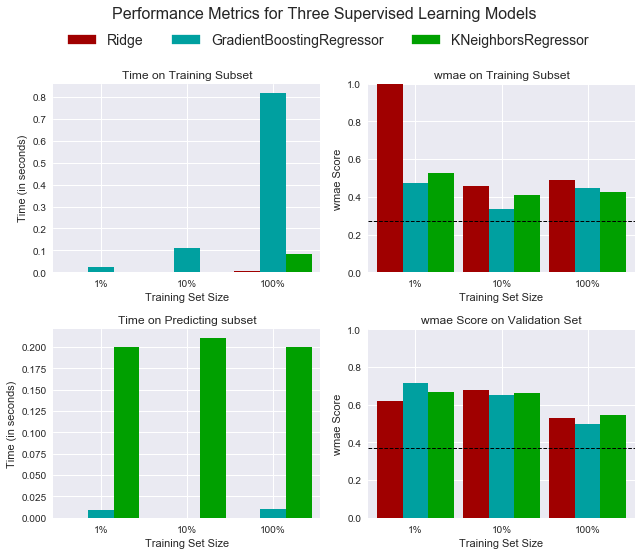

In [183]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor

reg_A = Ridge(random_state=0)
reg_B = GradientBoostingRegressor(random_state=0)
reg_D = KNeighborsRegressor(n_jobs=-1)

samples_1 = int(0.01*len(labels_train))
samples_10 = int(0.1*len(labels_train))
samples_100 = len(labels_train)

start = time()
results_no_product = {}
for reg in [reg_A, reg_B, reg_D]:
    reg_name = reg.__class__.__name__
    results_no_product[reg_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results_no_product[reg_name][i] = train_predict(reg, samples, features_train_no_product, labels_train, features_val_no_product, labels_val)
end = time()
print('3 model train & pred with no product features time:{:.4f}s'.format(end-start))
        
plot_result(results_no_product, mean_wmae_train, mean_wmae_val)

**舍弃掉product特征，wmae score会下降的比较厉害**